In [1]:
from sklearn.datasets import load_digits
digits = load_digits()

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

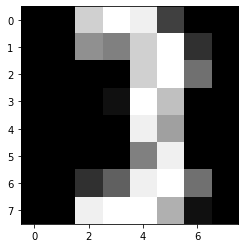

In [3]:
idx = 89
plt.imshow(digits['images'][idx], cmap=plt.cm.gray, interpolation='none')

In [4]:
digits['target'][idx]

3

In [5]:
digits['images'].shape

(1797, 8, 8)

In [6]:
digits['data'].shape

(1797, 64)

In [7]:
from sklearn.model_selection import train_test_split
from keras.utils import np_utils

Using TensorFlow backend.
C:\Users\the name oofn\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\the name oofn\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\the name oofn\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\the name oofn\Anaconda3\lib\site-packages\tenso

In [8]:
X = digits['data']
y = digits['target']

In [9]:
y = np_utils.to_categorical(y)

In [10]:
y[0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [19]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [20]:
in_dim = X.shape[1]
out_dim = y.shape[1]

In [21]:
from keras.models import Sequential
from keras.layers import Dense, Activation

In [22]:
model = Sequential()
model.add(Dense(128, input_shape=(in_dim,)))
model.add(Activation('relu'))
model.add(Dense(out_dim))
model.add(Activation('sigmoid'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [37]:
model.fit(x_train, y_train)

Epoch 1/1
1257/1257 [==============================] - 0s 62us/step - loss: 0.0431 - acc: 0.9928


In [38]:
loss, accuracy = model.evaluate(x_test, y_test)
accuracy

540/540 [==============================] - 0s 24us/step


0.9703703699288545

In [39]:
model.predict(x_test[:3])

array([[2.07722187e-05, 5.96046448e-08, 1.54972076e-06, 7.99477100e-04,
        0.00000000e+00, 2.65240669e-06, 0.00000000e+00, 0.00000000e+00,
        3.43620777e-05, 1.67776942e-02],
       [1.11341476e-04, 3.57627869e-07, 0.00000000e+00, 0.00000000e+00,
        8.33985209e-01, 1.04159117e-04, 2.03412771e-03, 1.78813934e-07,
        0.00000000e+00, 0.00000000e+00],
       [1.85427070e-03, 8.94069672e-08, 0.00000000e+00, 0.00000000e+00,
        9.34039712e-01, 1.01759635e-10, 6.44525244e-07, 6.62541822e-07,
        1.41575796e-09, 5.21573279e-12]], dtype=float32)

In [40]:
model.predict(x_test[:3]).argmax(axis = 1)

array([9, 4, 4], dtype=int64)

In [41]:
y_test[:3].argmax(axis = 1)

array([9, 4, 4], dtype=int64)

In [42]:
model.save('digits.h5')

In [ ]:
from keras.models import load_model
modal1 = load_model('digits.h5')